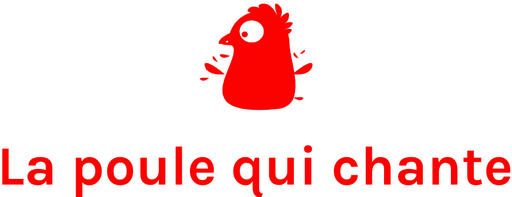

# <span style="color:purple">Produisez une étude de marché (Préparation, Nettoyage et Analyse exploratoire des données)

<span  style="color:purple">========================================================================================================

<span style="font-size:1.1em">**La poule qui chante** est une entreprise d’agroalimentaire souhaitant se développer à l’international. Voici une première analyse afin d'obtenir des groupements de pays que l'on peut cibler pour exporter nos poulets.

<span style="font-size:1.1em">L'étude est réalisée avec Python.

## <span style="color:blue">I. Préparation

<span style="font-size:1.1em">Tout d'abord, je procède à l'importation des librairies nécessaires à l'analyse.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

<span style="font-size:1.1em">Ensuite, j'importe le jeu de données, constitué de 4 fichiers.

- <span style="font-size:1.05em">**Fichier : Disponibilité alimentaire**

In [2]:
df_disponibilite = pd.read_csv('DisponibiliteAlimentaire_2017.csv')
df_disponibilite.shape

(176600, 14)

<span style="font-size:1.1em">Le fichier contient 176 600 lignes et 14 colonnes. Il indique les quantités des produits alimentaires et l'utilisation de ces produits, ainsi que les disponibilités alimentaires, pour les différents pays.

In [3]:
df_disponibilite.head(10)

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.0,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2302.0,S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,-119.0,S,Données standardisées
3,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5911,Exportations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,0.0,S,Données standardisées
4,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2511,Blé et produits,2017,2017,Milliers de tonnes,6701.0,S,Données standardisées
5,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5521,Aliments pour animaux,2511,Blé et produits,2017,2017,Milliers de tonnes,76.0,S,Données standardisées
6,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5527,Semences,2511,Blé et produits,2017,2017,Milliers de tonnes,344.0,S,Données standardisées
7,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5123,Pertes,2511,Blé et produits,2017,2017,Milliers de tonnes,642.0,S,Données standardisées
8,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5170,Résidus,2511,Blé et produits,2017,2017,Milliers de tonnes,0.0,S,Données standardisées
9,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5142,Nourriture,2511,Blé et produits,2017,2017,Milliers de tonnes,5640.0,S,Données standardisées


In [4]:
df_disponibilite['Année'].unique()

array([2017])

<span style="font-size:1.1em">Ce fichier est basé uniquement sur l'année 2017.

- <span style="font-size:1.05em">**Fichier : Population**

In [5]:
df_population = pd.read_csv('Population_2000_2018.csv')
df_population.shape

(4411, 15)

<span style="font-size:1.1em">Ce fichier contient 4 411 lignes et 15 colonnes, et recense la population des pays.

In [6]:
df_population.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,20779.953,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,21606.988,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,22600.770,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2003,2003,1000 personnes,23680.871,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2004,2004,1000 personnes,24726.684,X,Sources internationales sûres,NaN


In [7]:
df_population['Année'].min()

2000

In [8]:
df_population['Année'].max()

2018

<span style="font-size:1.1em">Le fichier correspond aux populations de 2000 à 2018.

- <span style="font-size:1.05em">**Fichier : PIB/habitant**

In [9]:
df_pib = pd.read_csv('pib_2017.csv')
df_pib.shape

(211, 15)

<span style="font-size:1.1em">Le fichier contient 211 lignes et 15 colonnes. Il indique le PIB/habitant annuel (en USD) pour chaque pays pour l'année 2017.

In [10]:
df_pib.head()

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,MK,Indicateurs macro,4,Afghanistan,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,US$,520.616409,X,Ciffre de sources internationales,NaN
1,MK,Indicateurs macro,710,Afrique du Sud,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,US$,6121.876572,X,Ciffre de sources internationales,NaN
2,MK,Indicateurs macro,8,Albanie,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,US$,4514.204908,X,Ciffre de sources internationales,NaN
3,MK,Indicateurs macro,12,Algérie,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,US$,4109.696001,X,Ciffre de sources internationales,NaN
4,MK,Indicateurs macro,276,Allemagne,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,US$,44651.829102,X,Ciffre de sources internationales,NaN


- <span style="font-size:1.05em">**Fichier : Stabilité politique**

In [11]:
df_stabilite = pd.read_csv('stab_pol_2017.csv')
df_stabilite.shape

(197, 15)

<span style="font-size:1.1em">Ce fichier comporte 1217 lignes et 15 colonnes. Il indique l'indice de stabilité politique des pays pour l'année 2017.

In [12]:
df_stabilite.head()

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,FS,Données de la sécurité alimentaire,4,Afghanistan,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,-2.80,X,Ciffre de sources internationales,NaN
1,FS,Données de la sécurité alimentaire,710,Afrique du Sud,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,-0.28,X,Ciffre de sources internationales,NaN
2,FS,Données de la sécurité alimentaire,8,Albanie,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,0.38,X,Ciffre de sources internationales,NaN
3,FS,Données de la sécurité alimentaire,12,Algérie,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,-0.92,X,Ciffre de sources internationales,NaN
4,FS,Données de la sécurité alimentaire,276,Allemagne,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,0.59,X,Ciffre de sources internationales,NaN


In [13]:
df_stabilite=df_stabilite[df_stabilite['Produit']=='Stabilité politique et absence de violence/terrorisme (indice)']

In [14]:
df_stabilite.shape

(197, 15)

## <span style="color:blue">II. Nettoyage du dataset
    
<span style="font-size:1.1em">Je réalise donc le nettoyage du jeu de données : les types des données, la présence de valeurs manquantes et de doublons, puis je fais la vérification des modifications effectuées.
    
<span style="font-size:1.1em">Je conserve uniquement les colonnes utilisées pour l'analyse.

In [15]:
# colonnes du fichier 'disponibilite' pour l'analyse
disponibilite_columns = ['Zone','Élément','Produit','Unité','Valeur']
df_disponibilite = df_disponibilite[disponibilite_columns]

In [16]:
# colonnes du fichier 'population' pour l'analyse
population_columns = ['Zone','Année','Valeur']
df_population = df_population[population_columns]

In [17]:
# colonnes du fichier 'pib' pour l'analyse
pib_columns = ['Zone','Valeur']
df_pib = df_pib[pib_columns]

In [18]:
# colonnes du fichier 'stabilite' pour l'analyse
stabilite_columns = ['Zone','Valeur']
df_stabilite = df_stabilite[stabilite_columns]

### <span style="color:orange">II.1. Types des données
    
<span style="font-size:1.1em">Je regarde les types des données afin de voir les modifications nécessaires pour la manipulation des données lors de l'analyse.    

- <span style="font-size:1.05em">**Fichier 'disponibilite'**

In [19]:
df_disponibilite.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176600 entries, 0 to 176599
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Zone     176600 non-null  object 
 1   Élément  176600 non-null  object 
 2   Produit  176600 non-null  object 
 3   Unité    176600 non-null  object 
 4   Valeur   176600 non-null  float64
dtypes: float64(1), object(4)
memory usage: 6.7+ MB


<span style="font-size:1.1em">Je modifie donc 4 types des données en chaîne de caractères (string).

In [20]:
var_modif = ['Zone','Élément','Produit','Unité']
for var in var_modif :
    df_disponibilite[var] = df_disponibilite[var].astype('string')

In [21]:
df_disponibilite['Zone'] = df_disponibilite['Zone'].astype('string')
df_disponibilite['Élément'] = df_disponibilite['Élément'].astype('string')
df_disponibilite['Produit'] = df_disponibilite['Produit'].astype('string')
df_disponibilite['Unité'] = df_disponibilite['Unité'].astype('string')

In [22]:
df_disponibilite.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176600 entries, 0 to 176599
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Zone     176600 non-null  string 
 1   Élément  176600 non-null  string 
 2   Produit  176600 non-null  string 
 3   Unité    176600 non-null  string 
 4   Valeur   176600 non-null  float64
dtypes: float64(1), string(4)
memory usage: 6.7 MB


- <span style="font-size:1.05em">**Fichier 'population'**

In [23]:
df_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4411 entries, 0 to 4410
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Zone    4411 non-null   object 
 1   Année   4411 non-null   int64  
 2   Valeur  4411 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 103.5+ KB


<span style="font-size:1.1em">Je modifie un seul type des données du fichier en chaîne de caractères aussi.

In [24]:
var_modif = ['Zone']
for var in var_modif :
    df_population[var] = df_population[var].astype('string')

In [25]:
 df_population['Zone'] = df_population['Zone'].astype('string')

<span style="font-size:1.1em">Pour les valeurs de population, il y a une unité pour 1000 personnes, il faut donc multiplier la colonne 'Valeur' par 1000, afin de ne pas garder la colonne 'Unité', puis je modifie le type des données de la colonne 'Valeur' en entiers (integer).

In [26]:
# conversion d'unité pour la population
df_population['Valeur'] = df_population['Valeur']*1000

In [27]:
var_modif = ['Valeur']
for var in var_modif :
    df_population[var] = df_population[var].astype('int')

In [28]:
df_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4411 entries, 0 to 4410
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Zone    4411 non-null   string
 1   Année   4411 non-null   int64 
 2   Valeur  4411 non-null   int64 
dtypes: int64(2), string(1)
memory usage: 103.5 KB


- <span style="font-size:1.05em">**Fichier 'pib'**

In [29]:
df_pib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Zone    211 non-null    object 
 1   Valeur  211 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


<span style="font-size:1.1em">Je modifie le type des colonnes 'Zone' et 'Produit' en chaîne de caractères.

In [30]:
var_modif = ['Zone']
for var in var_modif :
    df_pib[var] = df_pib[var].astype('string')

- <span style="font-size:1.05em">**Fichier 'stabilite'**

In [31]:
df_stabilite.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197 entries, 0 to 196
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Zone    197 non-null    object 
 1   Valeur  197 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.6+ KB


<span style="font-size:1.1em">Il faut modifier 2 types en chaîne de caractères.

In [32]:
var_modif = ['Zone']
for var in var_modif :
    df_stabilite[var] = df_stabilite[var].astype('string')

In [33]:
df_stabilite.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197 entries, 0 to 196
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Zone    197 non-null    string 
 1   Valeur  197 non-null    float64
dtypes: float64(1), string(1)
memory usage: 4.6 KB


### <span style="color:orange">II.2. Vérification de la présence de valeurs manquantes
    
<span style="font-size:1.1em">Je vérifie la présence de valeurs manquantes dans les données utilisées.

In [34]:
df_disponibilite.isnull().sum()

Zone       0
Élément    0
Produit    0
Unité      0
Valeur     0
dtype: int64

In [35]:
df_population.isnull().sum()

Zone      0
Année     0
Valeur    0
dtype: int64

In [36]:
df_pib.isnull().sum()

Zone      0
Valeur    0
dtype: int64

In [37]:
df_stabilite.isnull().sum()

Zone      0
Valeur    0
dtype: int64

<span style="font-size:1.1em">Il n'y a donc des valeurs manquantes . on va regarder les valeurs manquantes et mettre en place une stratégie

In [38]:
df_stabilite[df_stabilite['Valeur'].isna()]

,Zone,Valeur


In [39]:
df_stabilite[df_stabilite['Zone']=='Andorre']

,Zone,Valeur
5,Andorre,1.42


### <span style="color:orange">II.3. Recherche de doublons
    
<span style="font-size:1.1em">Il faut vérifier la présence de doublons dans les 2 fichiers. 

In [40]:
df_disponibilite.duplicated().sum()

0

In [41]:
df_population.duplicated().sum()

0

In [42]:
df_pib.duplicated().sum()

0

In [43]:
df_stabilite.duplicated().sum()

0

<span style="font-size:1.1em">Il n'y a donc pas de lignes en double présentes dans ces fichiers.

### <span style="color:orange">II.4. Renommer les colonnes
    
<span style="font-size:1.1em">Pour faciliter la compréhension de l'analyse, je modifie le nom de certaines colonnes.
    
- <span style="font-size:1.05em">*Fichier 'disponibilite'*

In [44]:
df_disponibilite.rename(columns={'Zone':'Pays'},inplace=True)

- <span style="font-size:1.05em">*Fichier 'population'*

In [45]:
df_population.rename(columns={'Zone':'Pays'},inplace=True)

In [46]:
df_population.rename(columns={'Valeur':'Population'},inplace=True)

- <span style="font-size:1.05em">*Fichier 'pib'*

In [47]:
df_pib.rename(columns={'Zone':'Pays'},inplace=True)

In [48]:
df_pib.rename(columns={'Valeur':'PIB_habitant annuel en USD'},inplace=True)

- <span style="font-size:1.05em">*Fichier 'stabilite'*

In [49]:
df_stabilite.rename(columns={'Zone':'Pays'},inplace=True)

In [50]:
df_stabilite.rename(columns={'Valeur':'Indice de stabilité politique'},inplace=True)

### <span style="color:orange">II.5. Conservation des lignes nécessaires
    
<span style="font-size:1.1em">I keep only the useful lines for the analysis, that is to say the lines concerning the poultry.

In [51]:
# recherche des produits liés aux volailles
df_disponibilite['Produit'].unique()

<StringArray>
[                'Blé et produits',                 'Riz et produits',
                'Orge et produits',                'Maïs et produits',
              'Seigle et produits',                          'Avoine',
              'Millet et produits',              'Sorgho et produits',
                'Céréales, Autres',     'Pommes de Terre et produits',
                         'Ignames',                     'Racines nda',
                    'Sucre, canne',                'Sucre, betterave',
                   'Sucre Eq Brut',              'Edulcorants Autres',
                            'Miel',                        'Haricots',
                            'Pois', 'Légumineuses Autres et produits',
                'Noix et produits',                            'Soja',
          'Arachides Decortiquees',            'Graines de tournesol',
          'Graines Colza/Moutarde',                'Graines de coton',
              'Coco (Incl Coprah)',                          'S

In [52]:
# filtre des lignes 'Viande de Volailles' dans le fichier 'disponibilite'
df_dispo_volailles = df_disponibilite[df_disponibilite['Produit']=='Viande de Volailles']

<span style="font-size:1.1em">Etant donné que le fichier 'disponibilite' ne concerne que l'année 2017, je conserve uniquement cette année pour le fichier 'population'.

In [53]:
# filtre de l'année 2017 dans le fichier 'population'
df_population = df_population.loc[df_population['Année']==2017]

### <span style="color:orange">II.6. Vérification des modifications
    
<span style="font-size:1.1em">Après le nettoyage du jeu de données, je vérifie que toutes les modifications, apportées aux 2 fichiers, soient bien effectuées avant de commencer l'analyse.

In [54]:
df_dispo_volailles.info()
df_dispo_volailles

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2061 entries, 651 to 176400
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Pays     2061 non-null   string 
 1   Élément  2061 non-null   string 
 2   Produit  2061 non-null   string 
 3   Unité    2061 non-null   string 
 4   Valeur   2061 non-null   float64
dtypes: float64(1), string(4)
memory usage: 96.6 KB


,Pays,Élément,Produit,Unité,Valeur
651,Afghanistan,Production,Viande de Volailles,Milliers de tonnes,28.00
652,Afghanistan,Importations - Quantité,Viande de Volailles,Milliers de tonnes,29.00
653,Afghanistan,Variation de stock,Viande de Volailles,Milliers de tonnes,0.00
654,Afghanistan,Disponibilité intérieure,Viande de Volailles,Milliers de tonnes,57.00
655,Afghanistan,Pertes,Viande de Volailles,Milliers de tonnes,2.00
...,...,...,...,...,...
176396,Zimbabwe,Nourriture,Viande de Volailles,Milliers de tonnes,67.00
176397,Zimbabwe,Disponibilité alimentaire en quantité (kg/pers...,Viande de Volailles,kg,4.68
176398,Zimbabwe,Disponibilité alimentaire (Kcal/personne/jour),Viande de Volailles,Kcal/personne/jour,16.00
176399,Zimbabwe,Disponibilité de protéines en quantité (g/pers...,Viande de Volailles,g/personne/jour,1.59


In [55]:
df_population.info()
df_population

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236 entries, 17 to 4409
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Pays        236 non-null    string
 1   Année       236 non-null    int64 
 2   Population  236 non-null    int64 
dtypes: int64(2), string(1)
memory usage: 7.4 KB


,Pays,Année,Population
17,Afghanistan,2017,36296113
36,Afrique du Sud,2017,57009756
55,Albanie,2017,2884169
74,Algérie,2017,41389189
93,Allemagne,2017,82658409
...,...,...,...
4333,Venezuela (République bolivarienne du),2017,29402484
4352,Viet Nam,2017,94600648
4371,Yémen,2017,27834819
4390,Zambie,2017,16853599


In [56]:
df_pib.info()
df_pib

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Pays                        211 non-null    string 
 1   PIB_habitant annuel en USD  211 non-null    float64
dtypes: float64(1), string(1)
memory usage: 3.4 KB


,Pays,PIB_habitant annuel en USD
0,Afghanistan,520.616409
1,Afrique du Sud,6121.876572
2,Albanie,4514.204908
3,Algérie,4109.696001
4,Allemagne,44651.829102
...,...,...
206,Venezuela (République bolivarienne du),8432.288335
207,Viet Nam,2365.521494
208,Yémen,745.087677
209,Zambie,1534.874627


In [57]:
df_stabilite.info()
df_stabilite

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197 entries, 0 to 196
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Pays                           197 non-null    string 
 1   Indice de stabilité politique  197 non-null    float64
dtypes: float64(1), string(1)
memory usage: 4.6 KB


,Pays,Indice de stabilité politique
0,Afghanistan,-2.80
1,Afrique du Sud,-0.28
2,Albanie,0.38
3,Algérie,-0.92
4,Allemagne,0.59
...,...,...
192,Venezuela (République bolivarienne du),-1.27
193,Viet Nam,0.23
194,Yémen,-2.94
195,Zambie,0.15


## <span style="color:blue">III. Analyse des données
    
<span style="font-size:1.1em">Je commence par préparer le dataframe qui sera utilisé pour l'analyse.
    
### <span style="color:orange">III.1. Préparation du dataframe final
    
<span style="font-size:1.1em">Je pivote le fichier 'disponibilite', je conserve les colonnes nécessaires à l'analyse, puis je fais les jointure entre les fichiers.

In [58]:
df_dispo_volailles

,Pays,Élément,Produit,Unité,Valeur
651,Afghanistan,Production,Viande de Volailles,Milliers de tonnes,28.00
652,Afghanistan,Importations - Quantité,Viande de Volailles,Milliers de tonnes,29.00
653,Afghanistan,Variation de stock,Viande de Volailles,Milliers de tonnes,0.00
654,Afghanistan,Disponibilité intérieure,Viande de Volailles,Milliers de tonnes,57.00
655,Afghanistan,Pertes,Viande de Volailles,Milliers de tonnes,2.00
...,...,...,...,...,...
176396,Zimbabwe,Nourriture,Viande de Volailles,Milliers de tonnes,67.00
176397,Zimbabwe,Disponibilité alimentaire en quantité (kg/pers...,Viande de Volailles,kg,4.68
176398,Zimbabwe,Disponibilité alimentaire (Kcal/personne/jour),Viande de Volailles,Kcal/personne/jour,16.00
176399,Zimbabwe,Disponibilité de protéines en quantité (g/pers...,Viande de Volailles,g/personne/jour,1.59


In [59]:
# pivot: de cai Dong Disponibilite thanh cot ""
df_dispo_final = df_dispo_volailles.pivot(index='Pays', columns='Élément', values='Valeur')

In [60]:
df_dispo_final.head()

Élément,Alimentation pour touristes,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/pers...,Disponibilité de matière grasse en quantité (g...,Disponibilité de protéines en quantité (g/pers...,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Résidus,Semences,Traitement,Variation de stock
Pays,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,5.0,1.53,0.33,0.54,57.0,NaN,29.0,55.0,2.0,28.0,0.0,NaN,NaN,0.0
Afrique du Sud,0.0,NaN,NaN,143.0,35.69,9.25,14.11,2118.0,63.0,514.0,2035.0,83.0,1667.0,0.0,NaN,NaN,-0.0
Albanie,NaN,NaN,NaN,85.0,16.36,6.45,6.26,47.0,0.0,38.0,47.0,NaN,13.0,0.0,NaN,NaN,4.0
Algérie,0.0,NaN,NaN,22.0,6.38,1.50,1.97,277.0,0.0,2.0,264.0,13.0,275.0,0.0,NaN,NaN,0.0
Allemagne,NaN,NaN,NaN,71.0,19.47,4.16,7.96,1739.0,646.0,842.0,1609.0,NaN,1514.0,-38.0,NaN,167.0,-29.0


In [61]:
# filtre des colonnes nécessaires biet ten cac cot thong tin
df_dispo_final.columns

Index(['Alimentation pour touristes', 'Aliments pour animaux',
       'Autres utilisations (non alimentaire)',
       'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Disponibilité intérieure', 'Exportations - Quantité',
       'Importations - Quantité', 'Nourriture', 'Pertes', 'Production',
       'Résidus', 'Semences', 'Traitement', 'Variation de stock'],
      dtype='string', name='Élément')

<span style="font-size:1.1em">Pour faciliter la manipulation des données, je renomme les colonnes du fichier 'dispo_final'.

In [62]:
#inplace nghia la thay vao luon ma ko tao thanh cot nao het

In [63]:
df_dispo_final.rename(columns={'Disponibilité intérieure':'Disponibilité_intérieure'},inplace=True)

In [64]:
df_dispo_final.rename(columns={'Importations - Quantité':'Importations'},inplace=True)

In [65]:
df_dispo_final.rename(columns={'Exportations - Quantité':'Exportations'},inplace=True)

In [66]:
#Liet ke nhung cot ma thay muon giu, thay gan cho no 1 cai bien'

In [67]:
dispo_columns =['Disponibilité alimentaire (Kcal/personne/jour)','Disponibilité alimentaire en quantité (kg/personne/an)',
'Disponibilité de matière grasse en quantité (g/personne/jour)',
'Disponibilité de protéines en quantité (g/personne/jour)','Disponibilité_intérieure', 'Exportations',
'Importations','Nourriture','Production']
df_dispo_final = df_dispo_final[dispo_columns]

In [68]:
df_dispo_final.head()

Élément,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité_intérieure,Exportations,Importations,Nourriture,Production
Pays,,,,,,,,,
Afghanistan,5.0,1.53,0.33,0.54,57.0,NaN,29.0,55.0,28.0
Afrique du Sud,143.0,35.69,9.25,14.11,2118.0,63.0,514.0,2035.0,1667.0
Albanie,85.0,16.36,6.45,6.26,47.0,0.0,38.0,47.0,13.0
Algérie,22.0,6.38,1.50,1.97,277.0,0.0,2.0,264.0,275.0
Allemagne,71.0,19.47,4.16,7.96,1739.0,646.0,842.0,1609.0,1514.0


In [69]:
df_population.rename(columns={'valeur':'Population',inplace=True}

SyntaxError: invalid syntax (1799190082.py, line 1)

In [ ]:
pop_columns = ['Pays','Population']
df_population = df_population[pop_columns]

In [ ]:
df_dispo_pop = pd.merge(df_dispo_final,df_population,on='Pays',how='outer',indicator=True)
df_dispo_pop.head()


In [ ]:
df_dispo_final.shape

In [ ]:
#decide what is interesting to join them together

In [ ]:
df_dispo_pop['_merge'].value_counts()

In [ ]:
df_dispo_pop

<span style="font-size:1.1em">En faisant une jointure externe, il y a 64 pays du fichier 'population' qui n'ont pas de correspondance avec le fichier 'disponibilite', c'est-à-dire que les informations de ces pays sont manquantes. Je fais donc une jointure interne, car ces pays ne pourront pas être étudiés dans cette étude de marché.

In [ ]:
df_dispo_pop = pd.merge(df_population,df_dispo_final,on='Pays',how='inner')
df_dispo_pop

<span style="font-size:1.1em">Après le pivot puis la jointure, des valeurs manquantes sont présentes.

In [ ]:
df_dispo_pop.isnull().sum()

<span style="font-size:1.1em">Il faut donc regarder les pays ayant des valeurs manquantes dans les 5 colonnes concernées.
    
<span style="font-size:1.1em">Je cherche ensuite sur le site FAO (source des 2 fichiers), afin de corriger ces valeurs.
    
- <span style="font-size:1.05em">*Colonne 'Disponibilité intérieure'*

In [ ]:
# filtre les valeurs manquantes dans la colonne 'Disponibilité intérieure'
df_nan_mask = df_dispo_pop['Disponibilité_intérieure'].isna()
filtre_nan = df_dispo_pop[df_nan_mask]
filtre_nan

<span style="font-size:1.1em">Pour cette colonne, l'Ouzbékistan a une disponibilité intérieure de 67 milliers de tonnes de viande de volailles, et la République démocratique populaire lao, 38 milliers de tonnes. Je décide donc de remplacer ces valeurs manquantes par la moyenne des 2 valeurs.

In [ ]:
# remplacement par la moyenne des 2 valeurs
df_dispo_pop['Disponibilité_intérieure'].fillna(52.5, inplace=True)

- <span style="font-size:1.05em">*Colonne 'Exportations'*

In [ ]:
# filtre les valeurs manquantes dans la colonne 'Exportations'
df_nan_mask = df_dispo_pop['Exportations'].isna()
filtre_nan = df_dispo_pop[df_nan_mask]
filtre_nan

<span style="font-size:1.1em">En ce qui concerne la colonne 'Exportations', il faut remplacer les valeurs par 0 (valeurs affichées sur le site FAO).

In [ ]:
# remplacement par 0
df_dispo_pop['Exportations'].fillna(0, inplace=True)

- <span style="font-size:1.05em">*Colonne 'Importations'*

In [ ]:
# filtre les valeurs manquantes dans la colonne 'Importations'
df_nan_mask = df_dispo_pop['Importations'].isna()
filtre_nan = df_dispo_pop[df_nan_mask]
filtre_nan

<span style="font-size:1.1em">Pour la colonne 'Importations', l'Ouzbékistan importe 8 milliers de tonnes et la République démocratique populaire lao, seulement 5. Je remplace les valeurs manquantes par la moyenne de ces valeurs.

In [ ]:
# remplacement par la moyenne des 2 valeurs
df_dispo_pop['Importations'].fillna(6.5, inplace=True)

- <span style="font-size:1.05em">*Colonne 'Nourriture'*

In [ ]:
# filtre les valeurs manquantes dans la colonne 'Nourriture'
df_nan_mask = df_dispo_pop['Nourriture'].isna()
filtre_nan = df_dispo_pop[df_nan_mask]
filtre_nan

<span style="font-size:1.1em">L'Ouzbékistan utilise 67 milliers de tonnes comme alimentation humaine et la République démocratique populaire lao, 38 milliers de tonnes. Je remplace les valeurs manquantes par la moyenne des 2.

In [ ]:
# remplacement par la moyenne des 2 valeurs
df_dispo_pop['Nourriture'].fillna(52.5, inplace=True)

- <span style="font-size:1.05em">*Colonne 'Production'*

In [ ]:
# filtre les valeurs manquantes dans la colonne 'Production'
df_nan_mask = df_dispo_pop['Production'].isna()
filtre_nan = df_dispo_pop[df_nan_mask]
filtre_nan

<span style="font-size:1.1em">Sur le site FAO, Djibouti et les Maldives n'ont aucune production, alors que l'Ouzbékistan produit 58 milliers de tonnes, et la République démocratique populaire lao, 33 milliers de tonnes. Au vu des autres quantités affichées pour les pays et ne pas fausser l'analyse, je remplace par 0.

In [ ]:
# remplacement par 0
df_dispo_pop['Production'].fillna(0, inplace=True)

<span style="font-size:1.1em">Je vérifie ensuite l'absence de valeurs manquantes après nettoyage.

In [ ]:
df_dispo_pop.isnull().sum()

<span style="font-size:1.1em">Ensuite, je fais la jointure avec le fichier 'pib'.

In [ ]:
df_dispo_pop_pib = pd.merge(df_dispo_pop,df_pib,on='Pays',how='outer',indicator=True)
df_dispo_pop_pib['_merge'].value_counts()

In [ ]:
df_dispo_pop_pib

<span style="font-size:1.1em">En faisant une jointure externe, 23 pays de notre fichier 'pib' qui n'ont pas de concordance dans le dataframe 'dispo_pop', je vais donc les écarter car ils ne pourront pas être étudiés. Par contre, il y a 8 pays qui n'ont pas de concordance dans le fichier 'pib', mais il y a la possibilité de remplacer les valeurs manquantes de la colonne 'PIB'.

In [ ]:
df_dispo_pop_pib.isnull().sum()

<span style="font-size:1.1em">Je fais donc une jointure externe gauche afin de conserver les 8 valeurs manquantes de la colonne 'PIB_habitant annuel en USD', et je remplace ces 8 valeurs manquantes par la moyenne.

In [ ]:
df_dispo_pop_pib = pd.merge(df_dispo_pop,df_pib,on='Pays',how='left')
df_dispo_pop_pib

In [ ]:
df_nan_mask = df_dispo_pop_pib ['PIB_habitant annuel en USD'].isna()
df_dispo_pop_pib ['df_nan_mask']

In [ ]:
# remplacement par la moyenne
mean = df_dispo_pop_pib['PIB_habitant annuel en USD'].mean()
df_dispo_pop_pib['PIB_habitant annuel en USD'].fillna(mean, inplace=True)

In [ ]:
df_dispo_pop_pib['PIB_habitant annuel en USD'] = round(df_dispo_pop_pib['PIB_habitant annuel en USD'],1)

<span style="font-size:1.1em">Ensuite, je réalise la jointure entre le dataframe et le fichier 'stabilite', afin d'obtenir le dataframe pour l'analyse.

In [ ]:
df_analyse = pd.merge(df_dispo_pop_pib,df_stabilite,on='Pays',how='outer',indicator=True)
df_analyse['_merge'].value_counts()

In [ ]:
df_analyse.isnull().sum()

<span style="font-size:1.1em">En faisant une jointure externe, 28 pays du fichier 'stabilite' n'ont pas de concordance avec le dataframe, je ne les conserve donc pas dans le dataframe final. Par contre, je conserve les 3 pays qui ont une valeur manquante dans la colonne 'Indice de stabilité politique', valeurs que je remplace par 0.

In [ ]:
df_analyse = pd.merge(df_dispo_pop_pib,df_stabilite,on='Pays',how='left')
df_analyse

In [ ]:
# remplacement par 0
df_analyse['Indice de stabilité politique'].fillna(0, inplace=True)

<span style="font-size:1.1em">Puis, je vérifie l'absence de valeurs manquantes dans le dataframe final.

In [ ]:
df_analyse.isnull().sum()

In [ ]:
df_analyse

<span style="font-size:1.1em">Dans ce dataframe final, lorsque l'unité n'est pas mentionnée dans les colonnes de quantités alimentaires, il s'agit de milliers de tonnes.

### <span style="color:orange">III.2. Analyse du dataframe final
    
<span style="font-size:1.1em">Je regarde les informations contenues dans ce dataframe.

In [ ]:
df_analyse['Pays'].count()

<span style="font-size:1.1em">L'étude se base sur 172 pays.

- <span style="font-size:1.05em">**Population**

In [ ]:
plt.figure(figsize = (15,5))
plt.hist(df_analyse['Population'], bins=175, color='blue',edgecolor='black')
plt.ylabel('Nombre de pays', size='12')
plt.xlabel('Population', size='12')
plt.title('Répartition de la population des pays', size='14', color='red')
plt.grid(True)

In [ ]:
df_analyse.loc[df_analyse['Population']>1200000000]

<span style="font-size:1.1em">La **plus grande partie des pays** ont une **population inférieure à 100 millions d'habitants**, quelques uns entre 100 et 350 millions, et seulement 2 pays se distinguent à plus d'un milliard d'habitants: la Chine à 1,42 et l'Inde à 1,33 milliards. 
    
<span style="font-size:1.1em">2 pays se distinguent, je ragarde la présence d'outliers.

In [ ]:
plt.figure(figsize = (15,4))
df_analyse.boxplot(column='Population', vert=False)

<span style="font-size:1.1em">On distingue la présence d'outliers, dans la partie supérieure du graphique (boîte à moustaches ou boxplot).
    
<span style="font-size:1.1em">Je vais donc calculer l'écart interquartile IQ. D'abord, je calcule le quantile 0,25 qui correspond au quartile Q1, c'est-à-dire que 25 % des valeurs sont inférieures ou égales à Q1.

In [ ]:
Q1 = np.percentile(df_analyse['Population'], 25)
Q1

<span style="font-size:1.1em">25 % des pays ont une population inférieure ou égale à 2 874 480 habitants.
    
<span style="font-size:1.1em">Puis, je calcule le quantile 0,75 qui correspond au quartile Q3, c'est-à-dire que 75 % des valeurs sont inférieures ou égales à Q3.

In [ ]:
Q3 = np.percentile(df_analyse['Population'], 75)
Q3

<span style="font-size:1.1em">75 % des pays ont un population inférieure ou égale à 30 138 736 habitants.

<span style="font-size:1.1em">Je peux donc faire le calcul de l'écart interquartile IQ, qui mesure la dispersion de 50% des valeurs, qui correspond à celles comprises entre le 1er quartile Q1 et le 3ème quartile Q3.

In [ ]:
IQ = Q3 - Q1
round(IQ,2)

<span style="font-size:1.1em">Il faut considérer comme outliers, les valeurs au-dessus de Q3+1,5 IQ.

In [ ]:
max_outlier = Q3 + 1.5*IQ
round(max_outlier,2)

In [ ]:
outlier_pop = df_analyse.loc[df_analyse['Population']>=71035119]
outlier_pop['Pays'].count()

In [ ]:
outlier_pop['Pays']

<span style="font-size:1.1em">Il y a donc 18 pays considérés comme outliers. Je les conserve pour l'analyse.

- <span style="font-size:1.05em">**Viande de volailles disponible par habitant**

In [ ]:
plt.figure(figsize = (15,5))
plt.hist(df_analyse['Disponibilité alimentaire en quantité (kg/personne/an)'], bins=175, color='blue',edgecolor='black')
plt.ylabel('Nombre de pays', size='12')
plt.xlabel('Quantité disponible (kg/personne/an)', size='12')
plt.title('Disponibilité de viande de volailles des pays', size='14', color='red')
plt.grid(True)

<span style="font-size:1.1em">Pour la viande de volailles disponible, plus la quantité augmente, moins il y a de pays : la majorité des pays a **moins de 30 kg/pers/an disponibles**.

In [ ]:
df_analyse['Disponibilité alimentaire en quantité (kg/personne/an)'].min()

In [ ]:
df_analyse.loc[df_analyse['Disponibilité alimentaire en quantité (kg/personne/an)']==0.13]

In [ ]:
df_analyse['Disponibilité alimentaire en quantité (kg/personne/an)'].max()

In [ ]:
df_analyse.loc[df_analyse['Disponibilité alimentaire en quantité (kg/personne/an)']==72.31]

<span style="font-size:1.1em">Le **minimum** de disponibilité de viande de volailles correspond à l'**Ethiopie** avec seulement à **0,13 kg/pers/an**, et le **maximum** aux **îles Saint-Vincent-et-les Grenadines** avec **72,31 kg/pers/an**.

In [ ]:
round(df_analyse['Disponibilité alimentaire en quantité (kg/personne/an)'].mean(),2)

In [ ]:
df_analyse['Disponibilité alimentaire en quantité (kg/personne/an)'].median()

<span style="font-size:1.1em">La **moyenne** des pays est de **20 kg/pers/an**, et **50 % des pays** ont une quantité disponible **inférieure à 18 kg/pers/an**.

In [ ]:
df_analyse.loc[df_analyse['Disponibilité alimentaire en quantité (kg/personne/an)']<3]

In [ ]:
df_analyse.loc[df_analyse['Disponibilité alimentaire en quantité (kg/personne/an)']>40]

<span style="font-size:1.1em">Une vingtaine de pays a moins de 3 kg/pers/an de volailles disponibles, ce sont des pays en difficultés.

<span style="font-size:1.1em">Et une vingtaine a une disponibilité de plus de 40 kg/pers/an, on a donc de très grandes inégalités entre les pays.
    
<span style="font-size:1.1em">Quelques pays ont une disponibilité par habitant beaucoup plus importatnte, je ragarde la présence d'outliers.

In [ ]:
plt.figure(figsize = (15,4))
df_analyse.boxplot(column='Disponibilité alimentaire en quantité (kg/personne/an)', vert=False)

<span style="font-size:1.1em">On distingue la présence d'outliers, dans la partie supérieure du graphique (boîte à moustaches ou boxplot).
    
<span style="font-size:1.1em">Je vais donc calculer l'écart interquartile IQ. D'abord, je calcule le quantile 0,25 qui correspond au quartile Q1.

In [ ]:
Q1 = np.percentile(df_analyse['Disponibilité alimentaire en quantité (kg/personne/an)'], 25)
round(Q1,2)

<span style="font-size:1.1em">25 % des pays ont une quantité disponible de viande de volailles inférieure ou égale à 6 kg/pers/an.
    
<span style="font-size:1.1em">Puis, je calcule le quantile 0,75 qui correspond au quartile Q3.

In [ ]:
Q3 = np.percentile(df_analyse['Disponibilité alimentaire en quantité (kg/personne/an)'], 75)
round(Q3,2)

<span style="font-size:1.1em">75 % des pays ont une quantité disponible inférieure ou égale à 30 kg/pers/an.

<span style="font-size:1.1em">Je fais donc le calcul de l'écart interquartile IQ, qui mesure la dispersion de 50% des valeurs, qui correspond à celles comprises entre le 1er quartile Q1 et le 3ème quartile Q3.

In [ ]:
IQ = Q3 - Q1
round(IQ,2)

<span style="font-size:1.1em">Je considére comme outliers, les valeurs au-dessus de Q3+1,5 IQ.

In [ ]:
max_outlier = Q3 + 1.5*IQ
round(max_outlier,2)

In [ ]:
outlier_dispo = df_analyse.loc[df_analyse['Disponibilité alimentaire en quantité (kg/personne/an)']>=65]
outlier_dispo['Pays'].count()

In [ ]:
outlier_dispo['Pays']

<span style="font-size:1.1em">Il y a seulement 2 pays considérés outliers : Israël et Saint-Vincent-et-les Grenadines. Je les conserve pour l'analyse.

- <span style="font-size:1.05em">**Protéines liés aux volailles par habitant par jour**

In [ ]:
plt.figure(figsize = (15,5))
plt.hist(df_analyse['Disponibilité de protéines en quantité (g/personne/jour)'], 
         bins=175, color='blue',edgecolor='black')
plt.ylabel('Nombre de pays', size='12')
plt.xlabel('Disponibilité (g/personne/jour)', size='12')
plt.title('Disponibilité de protéines (viande de volailles) des pays', size='14', color='red')
plt.grid(True)

<span style="font-size:1.1em">La majorité des pays a **moins de 10 g/pers/jour de protéines** de viande de volailles disponibles.

In [ ]:
df_analyse['Disponibilité de protéines en quantité (g/personne/jour)'].min()

In [ ]:
df_analyse.loc[df_analyse['Disponibilité de protéines en quantité (g/personne/jour)']==0.04]

In [ ]:
df_analyse['Disponibilité de protéines en quantité (g/personne/jour)'].max()

In [ ]:
df_analyse.loc[df_analyse['Disponibilité de protéines en quantité (g/personne/jour)']==27.87]

<span style="font-size:1.1em">Le pays avec le **moins de protéines de viande de volailles disponibles** est l'**Ethiopie avec 0,04 g/pers/jour**, et le **maximum** correspond à l'**Israël avec 27,87 g/pers/jour**.

In [ ]:
round(df_analyse['Disponibilité de protéines en quantité (g/personne/jour)'].mean(),2)

In [ ]:
round(df_analyse['Disponibilité de protéines en quantité (g/personne/jour)'].median(),2)

<span style="font-size:1.1em">La **moyenne** des pays est **7 g/pers/jour**, et **50 % des pays** ont une disponibilité **inférieure à 6,5 g/pers/jour**.

In [ ]:
df_analyse.loc[df_analyse['Disponibilité de protéines en quantité (g/personne/jour)']<2]

<span style="font-size:1.1em">Les pays, ayant le moins de disponibilité de protéines, **moins de 2 g/pers/jour**, sont principalement des **pays d'Afrique et d'Asie**.
    
<span style="font-size:1.1em">Des pays se distinguent, je regarde la présence d'outliers.

In [ ]:
plt.figure(figsize = (15,4))
df_analyse.boxplot(column='Disponibilité de protéines en quantité (g/personne/jour)', vert=False)

<span style="font-size:1.1em">On distingue la présence d'outliers, dans la partie supérieure du graphique (boîte à moustaches ou boxplot).
    
<span style="font-size:1.1em">Je calcule l'écart interquartile IQ. D'abord, je calcule le quantile 0,25 qui correspond au quartile Q1.

In [ ]:
Q1 = np.percentile(df_analyse['Disponibilité de protéines en quantité (g/personne/jour)'], 25)
Q1

<span style="font-size:1.1em">25 % des pays ont une quantité disponible de protéines inférieure ou égale à 2 g/pers/jour.
    
<span style="font-size:1.1em">Puis, je calcule le quantile 0,75 qui correspond au quartile Q3.

In [ ]:
Q3 = np.percentile(df_analyse['Disponibilité de protéines en quantité (g/personne/jour)'], 75)
Q3

<span style="font-size:1.1em">75 % des pays ont une quantité disponible de protéines inférieure ou égale à 10 g/pers/jour.

<span style="font-size:1.1em">Je fais donc le calcul de l'écart interquartile IQ, qui mesure la dispersion de 50% des valeurs, qui correspond à celles comprises entre le 1er quartile Q1 et le 3ème quartile Q3.

In [ ]:
IQ = Q3 - Q1
round(IQ,2)

<span style="font-size:1.1em">Il faut considérer comme outliers, les valeurs au-dessus de Q3+1,5 IQ.

In [ ]:
max_outlier = Q3 + 1.5*IQ
round(max_outlier,2)

In [ ]:
outlier_proteines = df_analyse.loc[df_analyse['Disponibilité de protéines en quantité (g/personne/jour)']>=22.5]
outlier_proteines['Pays'].count()

In [ ]:
outlier_proteines['Pays']

<span style="font-size:1.1em">Il y a 2 outliers, ce sont les mêmes que pour la quantité disponible en kg.

- <span style="font-size:1.05em">**Viande de volailles utilisée comme alimentation humaine**

In [ ]:
plt.figure(figsize = (15,5))
plt.hist(df_analyse['Nourriture'], bins=175, color='blue',edgecolor='black')
plt.ylabel('Nombre de pays', size='12')
plt.xlabel('Quantité utilisée comme nourriture (milliers de tonnes)', size='12')
plt.title('Utilisation de la viande de volailles des pays', size='14', color='red')
plt.grid(True)

<span style="font-size:1.1em">Presque la totalité des pays utilisent **moins de 2 500 milliers de tonnes de viande de volailles** pour la **nourriture**.  

In [ ]:
df_analyse.loc[df_analyse['Nourriture']>9500]

<span style="font-size:1.1em">Seuls **3 pays** se démarquent avec une quantité **supérieure à 9 500 milliers de tonnes** : le Brésil, la Chine et les États-Unis d'Amérique. 
    
<span style="font-size:1.1em">Comme 3 pays se démarquent des autres, je regarde la présence d'outliers.

In [ ]:
plt.figure(figsize = (15,4))
df_analyse.boxplot(column='Nourriture', vert=False)

<span style="font-size:1.1em">On distingue la présence d'outliers, dans la partie supérieure du graphique (boîte à moustaches ou boxplot).
    
<span style="font-size:1.1em">Il faut donc calculer l'écart interquartile IQ. D'abord, je calcule le quantile 0,25 qui correspond au quartile Q1.

In [ ]:
Q1 = np.percentile(df_analyse['Nourriture'], 25)
Q1

<span style="font-size:1.1em">25 % des pays ont une utilisation de la viande de volailles comme alimentation humaine inférieure ou égale à 29 milliers de tonnes.
    
<span style="font-size:1.1em">Puis, je calcule le quantile 0,75 qui correspond au quartile Q3.

In [ ]:
Q3 = np.percentile(df_analyse['Nourriture'], 75)
Q3

<span style="font-size:1.1em">75 % des pays ont une utilisation comme alimentation humaine inférieure ou égale à 353 milliers de tonnes.

<span style="font-size:1.1em">Je fais le calcul de l'écart interquartile IQ, qui mesure la dispersion de 50% des valeurs, qui correspond à celles comprises entre le 1er quartile Q1 et le 3ème quartile Q3.

In [ ]:
IQ = Q3 - Q1
round(IQ,2)

<span style="font-size:1.1em">Il faut considérer comme outliers, les valeurs au-dessus de Q3+1,5 IQ.

In [ ]:
max_outlier = Q3 + 1.5*IQ
round(max_outlier,2)

In [ ]:
outlier_nourriture = df_analyse.loc[df_analyse['Nourriture']>=840]
outlier_nourriture['Pays'].count()

In [ ]:
outlier_nourriture['Pays']

<span style="font-size:1.1em">Il y a 31 pays outliers, je les conserve pour l'analyse.

- <span style="font-size:1.05em">**Production de viande de volailles**

In [ ]:
plt.figure(figsize = (15,5))
plt.hist(df_analyse['Production'], bins=175, color='blue',edgecolor='black')
plt.ylabel('Nombre de pays', size='12')
plt.xlabel('Quantité produite (milliers de tonnes)', size='12')
plt.title('Production de viande de volailles des pays', size='14', color='red')
plt.grid(True)

<span style="font-size:1.1em">La plupart des pays produisent **moins de 1 000 milliers de tonnes de viande de volailles**.

In [ ]:
df_analyse['Production'].min()

In [ ]:
df_analyse.loc[df_analyse['Production']==0]

<span style="font-size:1.1em">12 pays n'ont **aucune production de viande de volailles**, ce sont des petits pays et des îles, exceptée la Mongolie qui compte plus de 3 millions d'habitants, connue pour sa vie nomade.

In [ ]:
df_analyse['Production'].max()

In [ ]:
df_analyse.loc[df_analyse['Production']==21914]

<span style="font-size:1.1em">Les **États-Unis d'Amérique** sont ceux qui **produisent** le **plus de viande de volailles**, avec une disponibilité intérieure importante pour ses habitants.

In [ ]:
round(df_analyse['Production'].mean(),2)

In [ ]:
df_analyse['Production'].median()

<span style="font-size:1.1em">La **moyenne** est de **708 milliers de tonnes de production**, alors que **50 % des pays** ont une production inférieure à **seulement 66 milliers de tonnes**.

In [ ]:
df_analyse.loc[df_analyse['Production']>10000]

<span style="font-size:1.1em">**3 pays** produisent **plus de 10 000 milliers de tonnes** : les États-Unis d'Amérique avec une production de 21 914, suivi de la Chine et du Brésil.
    
<span style="font-size:1.1em">3 pays se démarquent, je regarde la présence d'outliers.

In [ ]:
plt.figure(figsize = (15,4))
df_analyse.boxplot(column='Production', vert=False)

<span style="font-size:1.1em">On distingue la présence d'outliers, dans la partie supérieure du graphique (boîte à moustaches ou boxplot).
    
<span style="font-size:1.1em">Il faut donc calculer l'écart interquartile IQ. D'abord, je calcule le quantile 0,25 qui correspond au quartile Q1.

In [ ]:
Q1 = np.percentile(df_analyse['Production'], 25)
Q1

<span style="font-size:1.1em">25 % des pays ont une production de viande de volailles inférieure ou égale à 14 milliers de tonnes.
    
<span style="font-size:1.1em">Puis, je calcule le quantile 0,75 qui correspond au quartile Q3.

In [ ]:
Q3 = np.percentile(df_analyse['Production'], 75)
Q3

<span style="font-size:1.1em">75 % des pays ont une production inférieure ou égale à 368 milliers de tonnes.

<span style="font-size:1.1em">Je fais le calcul de l'écart interquartile IQ, qui mesure la dispersion de 50% des valeurs, qui correspond à celles comprises entre le 1er quartile Q1 et le 3ème quartile Q3.

In [ ]:
IQ = Q3 - Q1
round(IQ,2)

<span style="font-size:1.1em">Je considére comme outliers, les valeurs au-dessus de Q3+1,5 IQ.

In [ ]:
max_outlier = Q3 + 1.5*IQ
round(max_outlier,2)

In [ ]:
outlier_prod = df_analyse.loc[df_analyse['Production']>=899]
outlier_prod['Pays'].count()

In [ ]:
outlier_prod['Pays']

<span style="font-size:1.1em">Il y a aussi 31 pays outliers, je les conserve pour l'analyse.

- <span style="font-size:1.05em">**PIB_habitant annuel en USD**

In [ ]:
plt.figure(figsize = (15,5))
plt.hist(df_analyse['PIB_habitant annuel en USD'], bins=175, color='blue',edgecolor='black')
plt.ylabel('Nombre de pays', size='12')
plt.xlabel('PIB/habitant en USD', size='12')
plt.title('PIB/habitant annuel des pays', size='14', color='red')
plt.grid(True)

<span style="font-size:1.1em">La **majorité des pays** a un PIB/habitant annuel **inférieur à 21 000 USD**.
    
<span style="font-size:1.1em">**6 pays** se distinguent avec un PIB/habitant **supérieur à 60 000 USD**.

In [ ]:
df_analyse['PIB_habitant annuel en USD'].min()

<span style="font-size:1.1em">Le **minimum** de PIB/habitant correspond à la **République centrafricaine** avec **seulement 912 USD**.

In [ ]:
df_analyse.loc[df_analyse['PIB_habitant annuel en USD']==912.8]

In [ ]:
df_analyse['PIB_habitant annuel en USD'].max()

<span style="font-size:1.1em">Quant au **maximum**, il correspond à la **Région Administrative Spéciale de Macao en Chine** avec 126 144 USD.
    
<span style="font-size:1.1em">Il y a donc de très grandes inégalités entre les PIB des différents pays.

In [ ]:
df_analyse.loc[df_analyse['PIB_habitant annuel en USD']==126144]

In [ ]:
round(df_analyse['PIB_habitant annuel en USD'].mean(),2)

In [ ]:
round(df_analyse['PIB_habitant annuel en USD'].median(),2)

<span style="font-size:1.1em">La **moyenne** du PIB/habitant annuel est égale à **20 342 USD**.
    
<span style="font-size:1.1em">La médiane indique que **50 % des pays** ont un PIB/habitant **inférieur à 13 990 USD**.

In [ ]:
df_analyse.loc[df_analyse['PIB_habitant annuel en USD']>=60000]

<span style="font-size:1.1em">Il y a donc bien 6 pays avec un PIB/habitant supérieure à 60 000 USD, ce sont des pays relativement favorisés avec une faible population.
    
<span style="font-size:1.1em">Je regarde la présence d'outliers.

In [ ]:
plt.figure(figsize = (15,4))
df_analyse.boxplot(column='PIB_habitant annuel en USD', vert=False)

<span style="font-size:1.1em">On distingue la présence d'outliers, dans la partie supérieure du graphique (boîte à moustaches ou boxplot).
    
<span style="font-size:1.1em">Il faut donc calculer l'écart interquartile IQ. Je calcule, d'abord, le quantile 0,25 qui correspond au quartile Q1.

In [ ]:
Q1 = np.percentile(df_analyse['PIB_habitant annuel en USD'], 25)
Q1

<span style="font-size:1.1em">25 % des pays ont un PIB/habitant annuel inférieur ou égal à 5 104 USD.
    
<span style="font-size:1.1em">Puis, je calcule le quantile 0,75 qui correspond au quartile Q3.

In [ ]:
Q3 = np.percentile(df_analyse['PIB_habitant annuel en USD'], 75)
Q3

<span style="font-size:1.1em">75 % des pays ont un PIB/habitant inférieur ou égal à 28 086 USD.

<span style="font-size:1.1em">Je calcule l'écart interquartile IQ, qui mesure la dispersion de 50% des valeurs, qui correspond à celles comprises entre le 1er quartile Q1 et le 3ème quartile Q3.

In [ ]:
IQ = Q3 - Q1
round(IQ,2)

<span style="font-size:1.1em">Je considére comme outliers, les valeurs au-dessus de Q3+1,5 IQ.

In [ ]:
max_outlier = Q3 + 1.5*IQ
round(max_outlier,2)

In [ ]:
outlier_pib = df_analyse.loc[df_analyse['PIB_habitant annuel en USD']>=62560]
outlier_pib['Pays'].count()

In [ ]:
outlier_pib['Pays']

<span style="font-size:1.1em">Il y a 6 pays qui sont considérés comme outliers. Je conserve ces pays.

- <span style="font-size:1.05em">**Indice de stabilité politique**

In [ ]:
plt.figure(figsize = (15,5))
plt.hist(df_analyse['Indice de stabilité politique'], bins=175, color='blue',edgecolor='black')
plt.ylabel('Nombre de pays', size='12')
plt.xlabel('Indice', size='12')
plt.title('Indice de stabilité politique des pays', size='14', color='red')
plt.grid(True)

<span style="font-size:1.1em">Les pays ont principalement une **stabilité politique relativement correcte**. En effet, la **majorité des pays** a un indice de stabilité politique **supérieur à -1**.

In [ ]:
df_analyse['Indice de stabilité politique'].min()

<span style="font-size:1.1em">Le **minimun de l'indice de stabilité politique** correspond au **Yémen** avec -2,94 : pays du Moyen-Orient en guerre civile depuis 2014.

In [ ]:
df_analyse.loc[df_analyse['Indice de stabilité politique']==-2.94]

In [ ]:
df_analyse['Indice de stabilité politique'].max()

<span style="font-size:1.1em">Le **maximum** correspond à la **Nouvelle-Zélande** avec un indice de 1,6.

In [ ]:
df_analyse.loc[df_analyse['Indice de stabilité politique']==1.6]

In [ ]:
round(df_analyse['Indice de stabilité politique'].mean(),2)

In [ ]:
df_analyse['Indice de stabilité politique'].median()

<span style="font-size:1.1em">La **moyenne** est égale à **-0,06**.
    
<span style="font-size:1.1em">**50 % des pays** ont un indice de stabilité politique **inférieur à 0**.

In [ ]:
df_analyse.loc[df_analyse['Indice de stabilité politique']<=-1.5]

<span style="font-size:1.1em">**12 pays** se distinguent avec un **indice inférieur à -1,5** donc une mauvaise stabilité politique. Ce sont des pays qui sont instables politiquement.
    
<span style="font-size:1.1em">Il faut regarder la présence d'outliers. 

In [ ]:
plt.figure(figsize = (15,4))
df_analyse.boxplot(column='Indice de stabilité politique', vert=False)

<span style="font-size:1.1em">On distingue la présence d'outliers, dans la partie inférieure du graphique (boîte à moustaches ou boxplot).
    
<span style="font-size:1.1em">Il faut donc calculer l'écart interquartile IQ. D'abord, je calcule le quantile 0,25 qui correspond au quartile Q1.

In [ ]:
Q1 = np.percentile(df_analyse['Indice de stabilité politique'], 25)
Q1

<span style="font-size:1.1em">25 % des pays ont un indice de stabilité politique inférieur ou égal à -0,62.
    
<span style="font-size:1.1em">Puis, je calcule le quantile 0,75 qui correspond au quartile Q3.

In [ ]:
Q3 = np.percentile(df_analyse['Indice de stabilité politique'], 75)
Q3

<span style="font-size:1.1em">75 % des pays ont un indice inférieur ou égal à 0,65.

<span style="font-size:1.1em">Je fais le calcul de l'écart interquartile IQ, qui mesure la dispersion de 50% des valeurs, qui correspond à celles comprises entre le 1er quartile Q1 et le 3ème quartile Q3.

In [ ]:
IQ = Q3 - Q1
round(IQ,2)

<span style="font-size:1.1em">Je considére comme outliers, les valeurs en dessous de Q1-1,5 IQ.

In [ ]:
min_outlier = Q1 - 1.5*IQ
round(min_outlier,2)

In [ ]:
outlier_stab = df_analyse.loc[df_analyse['Indice de stabilité politique']<=-2.53]
outlier_stab['Pays'].count()

In [ ]:
outlier_stab['Pays']

<span style="font-size:1.1em">Seulement 2 pays sont outliers : l'Afghanistan et le Yémen. Je les conserve.

- <span style="font-size:1.05em">**Production et alimentation humaine**

In [ ]:
x=df_analyse['Production']
y=df_analyse['Nourriture']
plt.figure(figsize = (15,5))
plt.plot(x,y,linestyle='', marker='.', color='royalblue')
plt.xlabel('Quantité produite (milliers de tonnes)', size='12')
plt.ylabel('Quantité utilisée comme nourriture (milliers de tonnes)', size='12')
plt.title('Viande de volailles utilisée comme nourriture en fonction de la production', size='14', color='red')
plt.grid(True)

<span style="font-size:1.1em">La quantité utilisée comme alimentation humaine augmente proportionnellement avec la quantité produite.

In [ ]:
df_analyse.loc[df_analyse['Nourriture']>2500]

<span style="font-size:1.1em">**6 pays** se distinguent avec une utilisation comme **nourriture supérieure à 2 500 milliers de tonnes** : les États-Unis d'Amérique, la Chine et le Brésil avec tous les une production supérieure à 10 000 milliers de tonnes, et la Russie, le Mexique, l'Inde avec pour eux une production entre 2500 et 5 000 milliers de tonnes. 

<span style="font-size:1.1em">Les **2 variables** sont **quantitatives**, je teste la normalité des distributions, afin de savoir si je fais un test paramétrique ou non-paramétrique.

<span style="font-size:1.1em">On teste, tout d'abord, la normalité de la distribution de la colonne Production, puis celle de la colonne Nourriture.
    
<span style="font-size:1.1em">Hypothèses : **H0 = la distribution de la colonne suit une loi normale** et **H1 = la distribution ne suit pas une loi normale**.

In [ ]:
# test de normalité 'Production': Anderson-Darling
st.anderson(df_analyse['Production'], dist='norm')

<span style="font-size:1.1em">Le résultat du test (40,9) est supérieur à la valeur critique correspondant à 1 % (1,068), l'hypothèse H0 est donc rejetée, la **normalité** est **rejetée**.

In [ ]:
# test de normalité 'Nourriture': Anderson-Darling
st.anderson(df_analyse['Nourriture'], dist='norm')

<span style="font-size:1.1em">Le résultat du test (39,5) est supérieur à la valeur critique correspondant à 1 % (1,068), l'hypothèse H0 est donc rejetée, la **normalité** est **rejetée**.
    
<span style="font-size:1.1em">Comme la normalité des distributions ont été rejetées, on utilise un test non-paramétrique : le **test de corrélation de Spearman**.
    
<span style="font-size:1.1em">Hypothèses : **H0 = pas de corrélation entre la quantité produite et la quantité utilisée comme nourriture** et **H1 = corrélation entre les 2 variables**.

In [ ]:
# test de corrélation Spearman
st.spearmanr(df_analyse.Nourriture, df_analyse.Production)

<span style="font-size:1.1em">La p-valeur est inférieure à α=0,01 (1 %), l'**hypothèse H0** est donc **rejetée**. On a une **corrélation entre les 2 variables**. De plus, le coefficient montre une **corrélation fortement positive** : plus la quantité produite augmente, plus la quantité utilisée comme nourriture augmente. 

- <span style="font-size:1.05em">**Production et importations**

In [ ]:
x=df_analyse['Production']
y=df_analyse['Importations']
plt.figure(figsize = (15,5))
plt.plot(x,y,linestyle='', marker='.', color='royalblue')
plt.xlabel('Quantité produite (milliers de tonnes)', size='12')
plt.ylabel('Quantité importée (milliers de tonnes)', size='12')
plt.title('Importations en fonction de la production', size='14', color='red')
plt.grid(True)

In [ ]:
df_analyse.loc[df_analyse['Importations']>400]

<span style="font-size:1.1em">Seulement une douzaine de pays importent plus de 400 milliers de tonnes de viande de volailles.

<span style="font-size:1.1em">Les **2 variables** sont **quantitatives**, je teste la normalité des distributions, afin de savoir si je fais un test paramétrique ou non-paramétrique.

<span style="font-size:1.1em">On teste, tout d'abord, la normalité de la distribution de la colonne Production, puis celle de la colonne Importations.
    
<span style="font-size:1.1em">Hypothèses : **H0 = la distribution de la colonne suit une loi normale** et **H1 = la distribution ne suit pas une loi normale**.

In [ ]:
# test de normalité 'Production': Anderson-Darling
st.anderson(df_analyse['Production'], dist='norm')

<span style="font-size:1.1em">Le résultat du test (40,9) est supérieur à la valeur critique correspondant à 1 % (1,068), l'hypothèse H0 est donc rejetée, la **normalité** est **rejetée**.

In [ ]:
# test de normalité 'Importations': Anderson-Darling
st.anderson(df_analyse['Importations'], dist='norm')

<span style="font-size:1.1em">Le résultat du test (30,2) est supérieur à la valeur critique correspondant à 1 % (1,068), l'hypothèse H0 est donc rejetée, la **normalité** est **rejetée**.
    
<span style="font-size:1.1em">Comme la normalité des distributions ont été rejetées, on utilise un test non-paramétrique : le **test de corrélation de Spearman**.
    
<span style="font-size:1.1em">Hypothèses : **H0 = pas de corrélation entre la quantité produite et la quantité importée** et **H1 = corrélation entre les 2 variables**.

In [ ]:
# test de corrélation Spearman
st.spearmanr(df_analyse.Production, df_analyse.Importations)

<span style="font-size:1.1em">La p-valeur est inférieure à α=0,01 (1 %), l'**hypothèse H0** est donc **rejetée**. On a une **corrélation entre les 2 variables**. De plus, le coefficient montre une **corrélation légèrement positive** : la quantité importée augmente avec la quantité produite. Il y a, tout de même, des pays qui ne produisent pas ou peu de viande de volailles, et donc n'ont pas ou peu de quantité importée.

- <span style="font-size:1.05em">**Production et exportations**

In [ ]:
x=df_analyse['Production']
y=df_analyse['Exportations']
plt.figure(figsize = (15,5))
plt.plot(x,y,linestyle='', marker='.', color='royalblue')
plt.xlabel('Quantité produite (milliers de tonnes)', size='12')
plt.ylabel('Quantité exportée (milliers de tonnes)', size='12')
plt.title('Exportations en fonction de la production', size='14', color='red')
plt.grid(True)

In [ ]:
df_analyse.loc[df_analyse['Exportations']>1000]

<span style="font-size:1.1em">**4 pays exportent plus de 1 000 milliers de tonnes** de viande de volailles, dont les Pays-Bas qui exportent toute sa production, et la Pologne la moitié de sa production.

<span style="font-size:1.1em">Les **2 variables** sont **quantitatives**, je teste la normalité des distributions, afin de savoir si je fais un test paramétrique ou non-paramétrique.

<span style="font-size:1.1em">On teste, tout d'abord, la normalité de la distribution de la colonne Production, puis celle de la colonne Exportations.
    
<span style="font-size:1.1em">Hypothèses : **H0 = la distribution de la colonne suit une loi normale** et **H1 = la distribution ne suit pas une loi normale**.

In [ ]:
# test de normalité 'Production': Anderson-Darling
st.anderson(df_analyse['Production'], dist='norm')

<span style="font-size:1.1em">Le résultat du test (40,9) est supérieur à la valeur critique correspondant à 1 % (1,068), l'hypothèse H0 est donc rejetée, la **normalité** est **rejetée**.

In [ ]:
# test de normalité 'Exportations': Anderson-Darling
st.anderson(df_analyse['Exportations'], dist='norm')

<span style="font-size:1.1em">Le résultat du test (48,28) est supérieur à la valeur critique correspondant à 1 % (1,068), l'hypothèse H0 est donc rejetée, la **normalité** est **rejetée**.
    
<span style="font-size:1.1em">Comme la normalité des distributions ont été rejetées, on utilise un test non-paramétrique : le **test de corrélation de Spearman**.
    
<span style="font-size:1.1em">Hypothèses : **H0 = pas de corrélation entre la quantité produite et la quantité exportée** et **H1 = corrélation entre les 2 variables**.

In [ ]:
# test de corrélation Spearman
st.spearmanr(df_analyse.Production, df_analyse.Exportations)

<span style="font-size:1.1em">La p-valeur est inférieure à α=0,01 (1 %), l'**hypothèse H0** est donc **rejetée**. On a une **corrélation entre les 2 variables**. De plus, le coefficient montre une **corrélation positive** : la quantité exportée augmente avec la quantité produite. Il y a aussi des pays qui produisent mais ne font pas forcément d'exportations. 

- <span style="font-size:1.05em">**Production et disponibilité intérieure**

In [ ]:
x=df_analyse['Production']
y=df_analyse['Disponibilité_intérieure']
plt.figure(figsize = (15,5))
plt.plot(x,y,linestyle='', marker='.', color='royalblue')
plt.xlabel('Quantité produite (milliers de tonnes)', size='12')
plt.ylabel('Disponibilité intérieure (milliers de tonnes)', size='12')
plt.title('Disponibilité intérieure en fonction de la production', size='14', color='red')
plt.grid(True)

<span style="font-size:1.1em">La disponibilité intérieure augmente proportionnellement avec la quantité produite.

In [ ]:
df_analyse.loc[df_analyse['Disponibilité_intérieure']>2500]

<span style="font-size:1.1em">**6 pays** ont une **disponibilité intérieure supérieure à 2 500 milliers de tonnes** de viande de volailles.

<span style="font-size:1.1em">Les **2 variables** sont **quantitatives**, je teste la normalité des distributions, afin de savoir si je fais un test paramétrique ou non-paramétrique.

<span style="font-size:1.1em">On teste, tout d'abord, la normalité de la distribution de la colonne Production, puis celle de la colonne Disponibilité intérieure.
    
<span style="font-size:1.1em">Hypothèses : **H0 = la distribution de la colonne suit une loi normale** et **H1 = la distribution ne suit pas une loi normale**.

In [ ]:
# test de normalité 'Production': Anderson-Darling
st.anderson(df_analyse['Production'], dist='norm')

<span style="font-size:1.1em">Le résultat du test (40,9) est supérieur à la valeur critique correspondant à 1 % (1,068), l'hypothèse H0 est donc rejetée, la **normalité** est **rejetée**.

In [ ]:
# test de normalité 'Disponibilité_intérieure': Anderson-Darling
st.anderson(df_analyse['Disponibilité_intérieure'], dist='norm')

<span style="font-size:1.1em">Le résultat du test (38,8) est supérieur à la valeur critique correspondant à 1 % (1,068), l'hypothèse H0 est donc rejetée, la **normalité** est **rejetée**.
    
<span style="font-size:1.1em">Comme la normalité des distributions ont été rejetées, on utilise un test non-paramétrique : le **test de corrélation de Spearman**.
    
<span style="font-size:1.1em">Hypothèses : **H0 = pas de corrélation entre la quantité produite et la disponibilité intérieure** et **H1 = corrélation entre les 2 variables**.

In [ ]:
# test de corrélation Spearman
st.spearmanr(df_analyse.Production, df_analyse.Disponibilité_intérieure)

<span style="font-size:1.1em">La p-valeur est inférieure à α=0,01 (1 %), l'**hypothèse H0** est donc **rejetée**. On a une **corrélation entre les 2 variables**. De plus, le coefficient montre une **corrélation fortement positive** : plus la quantité produite augmente, plus la disponibilité intérieure augmente.

- <span style="font-size:1.05em">**Population et Production**

In [ ]:
x=df_analyse['Population']
y=df_analyse['Production']
plt.figure(figsize = (15,5))
plt.plot(x,y,linestyle='', marker='.', color='royalblue')
plt.xlabel('Population', size='12')
plt.ylabel('Quantité produite (milliers de tonnes)', size='12')
plt.title('Production en fonction de la population', size='14', color='red')
plt.grid(True)

In [ ]:
df_analyse.loc[df_analyse['Population']>200000000]

<span style="font-size:1.1em">La **Chine** se distingue avec une **population très élévée** et une **production** aussi avec **18 236 milliers de tonnes**, alors que l'**Inde** a une **forte population** mais une **production faible** à 3 545.

<span style="font-size:1.1em">Les **2 variables** sont **quantitatives**, je teste la normalité des distributions, afin de savoir si je fais un test paramétrique ou non-paramétrique.

<span style="font-size:1.1em">On teste, tout d'abord, la normalité de la distribution de la colonne Population, puis celle de la colonne Production.
    
<span style="font-size:1.1em">Hypothèses : **H0 = la distribution de la colonne suit une loi normale** et **H1 = la distribution ne suit pas une loi normale**.

In [ ]:
# test de normalité 'Population': Anderson-Darling
st.anderson(df_analyse['Population'], dist='norm')

<span style="font-size:1.1em">Le résultat du test (41,87) est supérieur à la valeur critique correspondant à 1 % (1,068), l'hypothèse H0 est donc rejetée, la **normalité** est **rejetée**.

In [ ]:
# test de normalité 'Production': Anderson-Darling
st.anderson(df_analyse['Production'], dist='norm')

<span style="font-size:1.1em">Le résultat du test (40,9) est supérieur à la valeur critique correspondant à 1 % (1,068), l'hypothèse H0 est donc rejetée, la **normalité** est **rejetée**.
    
<span style="font-size:1.1em">Comme la normalité des distributions ont été rejetées, on utilise un test non-paramétrique : le **test de corrélation de Spearman**.
    
<span style="font-size:1.1em">Hypothèses : **H0 = pas de corrélation entre la population et la quantité produite** et **H1 = corrélation entre les 2 variables**.

In [ ]:
# test de corrélation Spearman
st.spearmanr(df_analyse.Population, df_analyse.Production)

<span style="font-size:1.1em">La **p-valeur** est inférieure à α=0,01 (1 %), l'**hypothèse H0** est donc **rejetée**. On a une **corrélation entre les 2 variables**. De plus, le coefficient montre une **corrélation positive** : plus la population augmente, plus la quantité produite augmente.